<a href="https://colab.research.google.com/github/donggale72/10000.html/blob/main/ch04_04_%EB%B6%84%EB%A5%98%EB%AC%B8%EC%A0%9CEDA_titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch04.04. 분류문제 EDA - titanic
---
* 날짜:
* 이름:

## 학습내용
    - titanic 데이터 EDA
    - 분류문제 에서의 탐색적 데이터 분석 진행


## 라이브러리 및 데이터 로드
---

* 라이브러리 불러오기

In [ ]:
# 데이터 분석을 위한 pandas 라이브러리를 불러옵니다.
# 수치계산을 위한 numpy를 불러옵니다.
# 데이터 시각화를 위한 matplotlib, seaborn 을 불러옵니다.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from scipy.stats import *
import scipy as sp

* seaborn에서 제공하는 `titanic` 데이터셋을 불러오기

In [ ]:
df=sns.load_dataset('titanic')

* 데이터셋 일부 확인

In [ ]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## 데이터 기본 확인
---

### **| 결측치 확인**

* 결측지 개수 확인

In [ ]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

* 결측지 비율 확인

In [ ]:
df.isnull().mean()*100

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
parch           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64

### **| 기술통계**

* `info` 이용해 데이터 확인

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


* 숫자 자료형의 기술 통계

In [ ]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* 숫자 자료형 외의 기술 통계

In [ ]:
df.describe(include='category')

,class,deck
count,891,203
unique,3,7
top,Third,C
freq,491,59


* 숫자 자료형 외 값 및 개수 확인

In [ ]:
for col in ['class', 'deck']:
  print(col)
  print(df[col].value_counts())

class
Third     491
First     216
Second    184
Name: class, dtype: int64
deck
C    59
B    47
D    33
E    32
A    15
F    13
G     4
Name: deck, dtype: int64


### **| 변수 요약**

* 속성을 그리기전 bool 값을 가지는 속성 `adult_mal`과 `alone`을 int 값으로 변환해야 합니다.

In [ ]:
df['adult_male'].unique(),df['alone'].unique()


(array([ True, False]), array([False,  True]))

In [ ]:
df.loc[df['adult_male']==False,"adult_male"]=0
df.loc[df['adult_male']==True,"adult_male"]=1
df.loc[df['alone']==False,"alone"]=0
df.loc[df['alone']==True,"alone"]=1

In [ ]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,1,NaN,Southampton,no,0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,0,C,Cherbourg,yes,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,0,NaN,Southampton,yes,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,0,C,Southampton,yes,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,1,NaN,Southampton,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,1,NaN,Southampton,no,1
887,1,1,female,19.0,0,0,30.0000,S,First,woman,0,B,Southampton,yes,1
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,0,NaN,Southampton,no,0
889,1,1,male,26.0,0,0,30.0000,C,First,man,1,C,Cherbourg,yes,1


* 모든 속성의 분포 간단히 그리기

['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town', 'alive\talone']


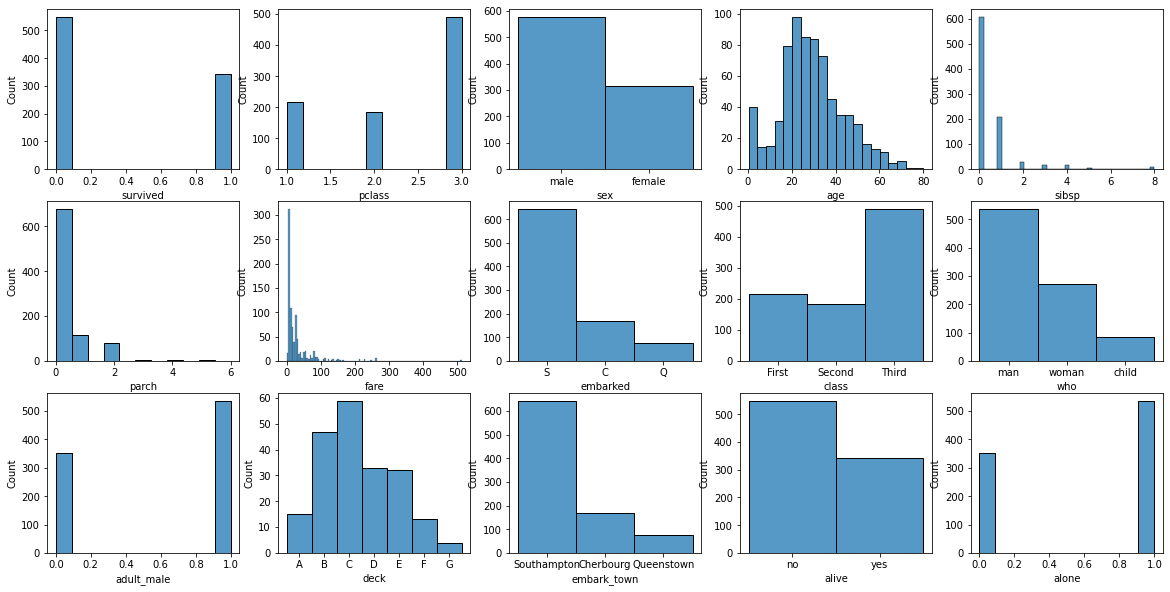

In [ ]:
f,axes=plt.subplots(3,5,figsize=(20,10))
axes=axes.flatten()
for col, ax in zip(df.columns, axes):
  sns.histplot(data=df, x=col, ax=ax)
plt.show()

* 자료형 정리하기

In [ ]:
df_=df.groupby('sex')['survived'].mean()*100
df_

sex
female    74.203822
male      18.890815
Name: survived, dtype: float64

In [ ]:
df1=df.groupby('sex')['survived'].count()
df1

sex
female    314
male      577
Name: survived, dtype: int64

In [ ]:
df2=df.groupby('class')['survived'].count()
df2

class
First     216
Second    184
Third     491
Name: survived, dtype: int64

In [ ]:
df3=df.groupby(['sex','class'])['survived'].mean()*100
df3

sex     class 
female  First     96.808511
        Second    92.105263
        Third     50.000000
male    First     36.885246
        Second    15.740741
        Third     13.544669
Name: survived, dtype: float64

* 데이터 정리하기
  * 데이터 소개: .타이타닉의 성별 class별 생존자료
  * 자료형 소개: 연속형 자료는 survived	pclass	age	sibsp	parch	fare
*  범주형 자료는 sex	embarked	class	who	adult_male	deck	embark_town	alive	alone
  * 모델링을 위한 자료형 구분: 위와 동일



## 데이터 분포
---

### **| 데이터 분포 시각화**

* 연속 자료형 분포 그리기

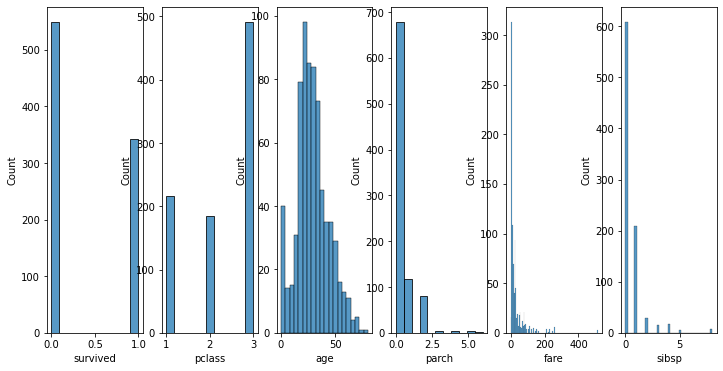

In [ ]:
num1=['survived','pclass',	'age','parch',	'fare',	'sibsp']
f,axes=plt.subplots(1,len(num1), figsize=(12,6))
axes=axes.flatten()
for col,ax in zip(num1, axes):
  sns.histplot(data=df,x=col, ax=ax)
plt.show()

* 이산 자료형 분포 그리기

### | **기술 통계량 시각화**

* 기술통계량 확인

* boxplot 으로 연속 자료형 기술 통계 시각화하기

* viloinplot 으로 연속 자료형 기술 통계 시각화하기

### **| 왜도와 첨도**

* `skew` 이용해 왜도 구하기

* `kurt` 이용해 첨도 구하기

### **| 예측값에 대한 추가 시각화**

* `countplot`으로 그리기


* `hue` 옵션에 범주형 속성 추가하기

## 속성간 관계 파악
---

### **| 상관분석**

* `corr`를 이용해 상관계수 구하기

* `style.background_gradient` 이용해 상관계수 시각화 하기

* `heatmap` 이용해 상관계수 시각화 하기

* 상관관계가 높은 속성 정리하기




### **| 속성간 관계 시각화**

* `pairplot` 이용해 시각화 하기 

In [ ]:
# pairplot 은 시간이 오래 걸리기 때문에 일부 샘플을 추출해 그리는게 좋습니다.


* `displot` 이용해 연속 자료형 별 예측값의 분포 `kde` 선으로 시각화 하기 

* 위에서 그린 플롯에 `col` 옵션으로 `sex` 추가하기

* 위에서 그린 플롯에 `hue` 옵션으로 `class` 추가하기

* `age`과 `fare`의 산점도를 그리고 `hue`옵션에 예측값 추가하기

* `lmplot`을 이용해 위의 산점도를 다시 그리고 `col` 옵션에 `class` 추가하기

* `histplot`으로 범주형 속성들과 예측값 히트맵 그리기